In [ ]:
#Instagram Reach Analysis

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
data = pd.read_csv('Instagram data.csv', encoding='cp1252')
data.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [22]:
data = data.dropna()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [33]:
data.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [34]:
data.nunique()

Impressions       101
From Home          97
From Hashtags     100
From Explore       95
From Other         84
Saves              84
Comments           15
Shares             28
Likes              85
Profile Visits     59
Follows            29
Caption            90
Hashtags           54
dtype: int64

In [35]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


In [37]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

C:\Users\reach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\reach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


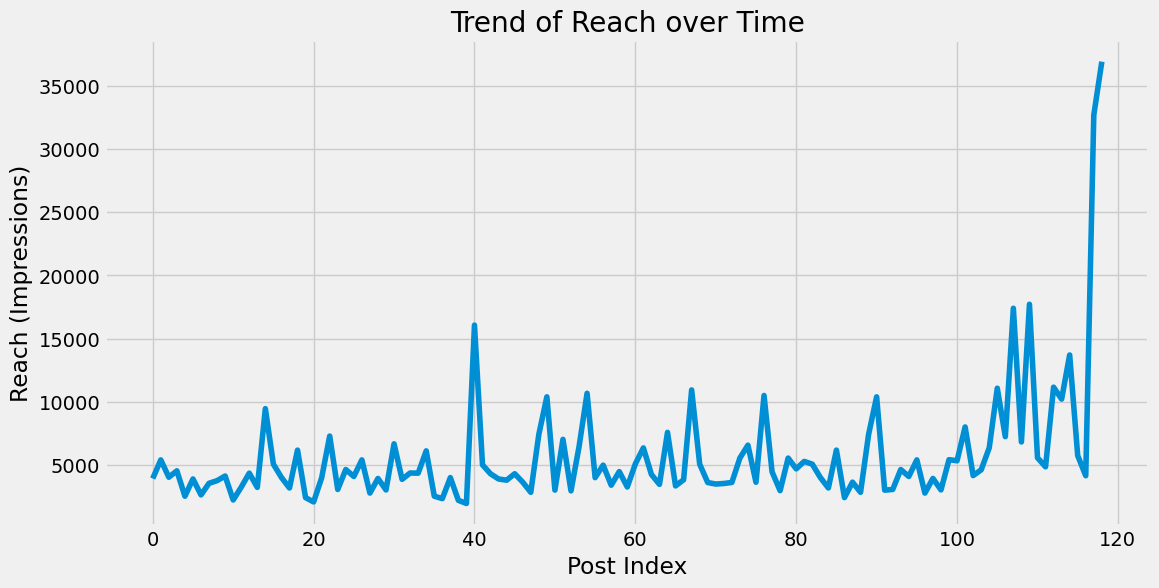

C:\Users\reach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


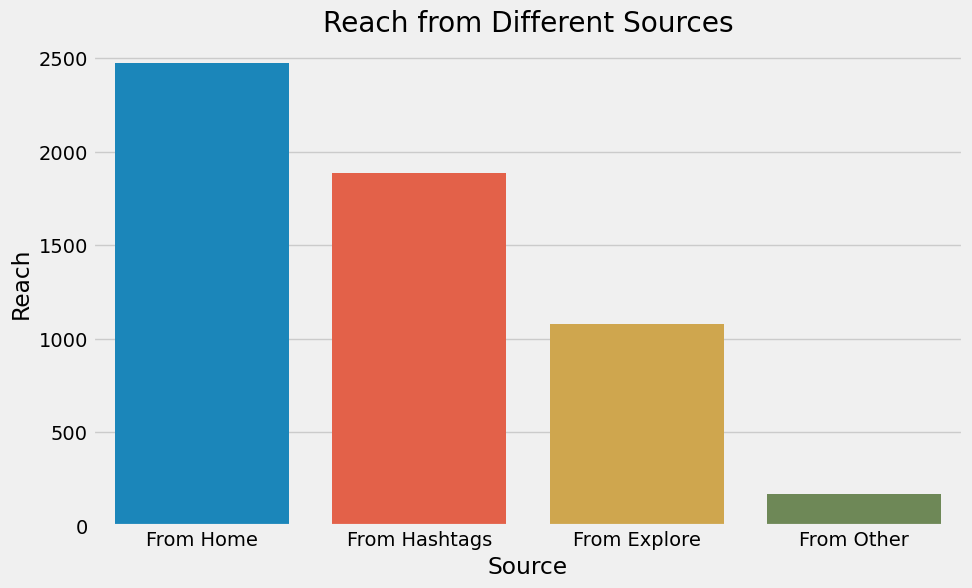

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['Impressions'])
plt.xlabel('Post Index')
plt.ylabel('Reach (Impressions)')
plt.title('Trend of Reach over Time')
plt.show()

# Example 2: Bar chart of Reach from Different Sources
plt.figure(figsize=(10, 6))
sns.barplot(x=['From Home', 'From Hashtags', 'From Explore', 'From Other'],
            y=[data['From Home'].mean(), data['From Hashtags'].mean(), data['From Explore'].mean(), data['From Other'].mean()])
plt.xlabel('Source')
plt.ylabel('Reach')
plt.title('Reach from Different Sources')
plt.show()

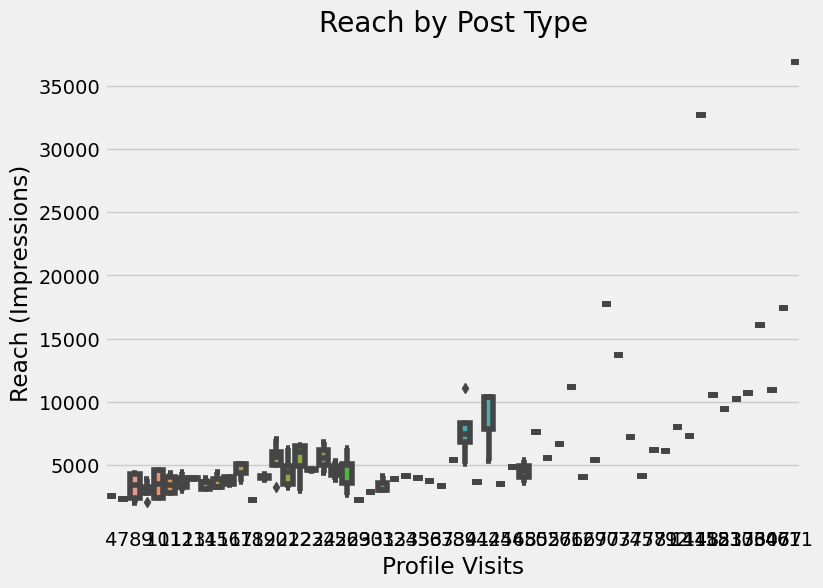

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Profile Visits'], y=data['Impressions'])
plt.xlabel('Profile Visits')
plt.ylabel('Reach (Impressions)')
plt.title('Reach by Post Type')
plt.show()

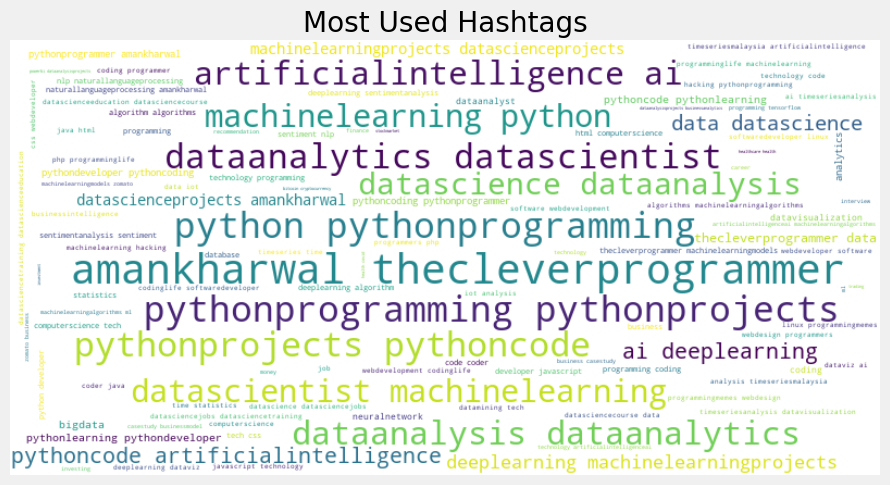

In [48]:
hashtags = ' '.join(data['Hashtags'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Hashtags')
plt.show()

In [42]:
X = data[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]
y = data['Impressions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the machine learning model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Use the trained model to predict the reach for new or future posts
new_data = pd.DataFrame({
    'From Home': [10],  # Example value, adjust according to your needs
    'From Hashtags': [5],  # Example value, adjust according to your needs
    'From Explore': [2],  # Example value, adjust according to your needs
    'From Other': [3],  # Example value, adjust according to your needs
    'Saves': [50],  # Example value, adjust according to your needs
    'Comments': [20],  # Example value, adjust according to your needs
    'Shares': [10],  # Example value, adjust according to your needs
    'Likes': [100],  # Example value, adjust according to your needs
    'Profile Visits': [30],  # Example value, adjust according to your needs
    'Follows': [5]  # Example value, adjust according to your needs
})

predicted_reach = model.predict(new_data)
print("Predicted Reach:", predicted_reach)

Mean Squared Error: 15766.22649630912
R-squared: 0.99959404890355
Predicted Reach: [82.23340518]


In [44]:
X = data[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]
y = data['Impressions']

# Train the machine learning model
model = LinearRegression()
model.fit(X, y)

# Interpret the coefficients or feature importances
coefficients = model.coef_
feature_importances = abs(coefficients) / abs(coefficients).sum()

# Identify the key factors that significantly influence reach
key_factors = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Feature Importance': feature_importances
})
key_factors = key_factors.sort_values(by='Coefficient', ascending=False)

# Print the key factors and their impact on reach
print(key_factors)

          Feature  Coefficient  Feature Importance
3      From Other     1.083024            0.117865
6          Shares     1.014369            0.110394
2    From Explore     1.007242            0.109618
0       From Home     1.001839            0.109030
1   From Hashtags     0.999318            0.108756
9         Follows     0.502452            0.054682
7           Likes     0.184422            0.020071
8  Profile Visits    -0.197059            0.021446
4           Saves    -0.318018            0.034610
5        Comments    -2.880908            0.313529
